In [3]:
import pandas

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Model, Input, load_model
from keras.layers import Embedding, Dense, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Concatenate

import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

In [4]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

sc = MinMaxScaler()
X = sc.fit_transform(X)
Y = Y.reshape(-1,1)
Y = sc.fit_transform(Y)

print(len(X))
print(len(Y))
#print(Y)

506
506


In [6]:
# split train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , random_state =7, test_size=0.05)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

480
480
26
26


In [7]:
# define baseline model
inputs = Input(shape=(13,))
dense1 = Dense(13, activation='relu')(inputs)
outputs = Dense(1,activation='relu')(dense1)
model = Model(inputs, outputs)

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Fit the model
model.fit(X_train, Y_train, epochs=100, batch_size=10,  verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 2/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 3/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 4/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 5/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 6/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 7/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 8/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 9/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 10/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 11/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 12/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 13/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 14/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 15/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 16/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 17/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 18/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 19/100
 - 0s - loss: 0.1950 - acc: 0.0042
Epoch 20/100
 - 0s - loss: 0.1950 - acc: 0.0042
E

[0.38152084]     [0.37111111]
[0.33903778]     [0.3]
[0.33665577]     [0.38222222]
[0.3026583]     [0.34222222]
[0.]     [0.08444444]
[0.09740718]     [0.07333333]
[0.33478004]     [0.36444444]
[0.46341905]     [0.41333333]
[0.4926157]     [0.41111111]
[0.16411346]     [0.31111111]
[0.10582873]     [0.11555556]
[0.57670337]     [0.59111111]
[0.26381138]     [0.29777778]
[0.2938038]     [0.32]
[0.75112885]     [0.86666667]
[0.34800372]     [0.40444444]
[0.43493533]     [0.37777778]
[0.6422075]     [0.62444444]
[0.21185783]     [0.18222222]
[0.39716423]     [0.37111111]
[0.269909]     [0.26]
[0.45832756]     [0.42]
[0.7907285]     [0.82888889]
[0.22235933]     [0.3]
[0.19318894]     [0.21333333]
[0.11878201]     [0.05555556]


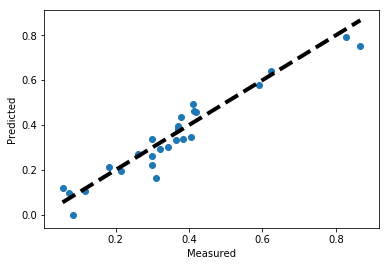

In [8]:
y_pred= model.predict(X_test)
for i in range(len(y_pred)):
    print(y_pred[i],'   ',Y_test[i])

fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()